In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_coad_c = {}
for num in num_list:
    fn = 'avg-COAD-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_c[num] = avg_rc

In [3]:
df_avgrcs_coad_c = pd.DataFrame(avgrcs_coad_c)
temp_coad_c = df_avgrcs_coad_c.T
temp_coad_c = temp_coad_c.reset_index()
temp_coad_c = pd.melt(temp_coad_c, id_vars = ["index"], value_vars = list(set(temp_coad_c.columns.tolist())))
temp_coad_c['label'] = 'cancerPeak_cancerFile'
temp_coad_c = temp_coad_c[temp_coad_c.variable <= 501]
temp_coad_c

,index,variable,value,label
0,809_030915,0,1.003668,cancerPeak_cancerFile
1,809_110914,0,1.008865,cancerPeak_cancerFile
2,986_100215,0,0.988194,cancerPeak_cancerFile
3,986_261016,0,0.984439,cancerPeak_cancerFile
4,809_030915,1,1.002749,cancerPeak_cancerFile
...,...,...,...,...
2003,986_261016,500,0.986890,cancerPeak_cancerFile
2004,809_030915,501,0.992645,cancerPeak_cancerFile
2005,809_110914,501,1.002316,cancerPeak_cancerFile
2006,986_100215,501,0.978682,cancerPeak_cancerFile


In [4]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_coad_h = {}
for num in num_list:
    fn = 'avg-COAD-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_h[num] = avg_rc

In [5]:
df_avgrcs_coad_h = pd.DataFrame(avgrcs_coad_h)
temp_coad_h = df_avgrcs_coad_h.T
temp_coad_h = temp_coad_h.reset_index()
temp_coad_h = pd.melt(temp_coad_h, id_vars = ["index"], value_vars = list(set(temp_coad_h.columns.tolist())))
temp_coad_h['label'] = 'cancerPeak_healthyFile'
temp_coad_h = temp_coad_h[temp_coad_h.variable <= 501]
temp_coad_h

,index,variable,value,label
0,556,0,1.039405,cancerPeak_healthyFile
1,557,0,1.033769,cancerPeak_healthyFile
2,558,0,1.062274,cancerPeak_healthyFile
3,559,0,1.014338,cancerPeak_healthyFile
4,560,0,1.041403,cancerPeak_healthyFile
...,...,...,...,...
8529,568,501,1.022743,cancerPeak_healthyFile
8530,569,501,1.014983,cancerPeak_healthyFile
8531,570,501,1.028456,cancerPeak_healthyFile
8532,571,501,1.007942,cancerPeak_healthyFile


In [6]:
temp_coad = pd.concat([temp_coad_h, temp_coad_c], ignore_index = True)
temp_coad['new_variable'] = temp_coad['variable'] - 250

In [7]:
temp_coad

,index,variable,value,label,new_variable
0,556,0,1.039405,cancerPeak_healthyFile,-250
1,557,0,1.033769,cancerPeak_healthyFile,-250
2,558,0,1.062274,cancerPeak_healthyFile,-250
3,559,0,1.014338,cancerPeak_healthyFile,-250
4,560,0,1.041403,cancerPeak_healthyFile,-250
...,...,...,...,...,...
10537,986_261016,500,0.986890,cancerPeak_cancerFile,250
10538,809_030915,501,0.992645,cancerPeak_cancerFile,251
10539,809_110914,501,1.002316,cancerPeak_cancerFile,251
10540,986_100215,501,0.978682,cancerPeak_cancerFile,251


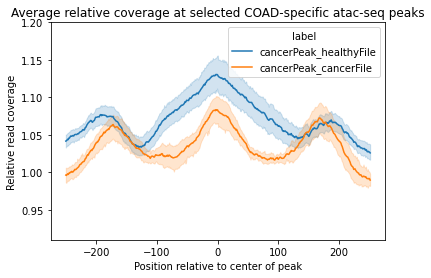

In [9]:
plt.figure()
plt.ylim(0.91,1.2)
p = sns.lineplot(data = temp_coad, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected COAD-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')

In [10]:
num_list = ['809_030915', '809_110914', '986_100215', '986_261016']
avgrcs_coad_c_zo = {}
for num in num_list:
    fn = 'zo-avg-COAD-cancer-' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_c_zo[num] = avg_rc

In [11]:
df_avgrcs_coad_c_zo = pd.DataFrame(avgrcs_coad_c_zo)
temp_coad_c_zo = df_avgrcs_coad_c_zo.T
temp_coad_c_zo = temp_coad_c_zo.reset_index()
temp_coad_c_zo = pd.melt(temp_coad_c_zo, id_vars = ["index"], value_vars = list(set(temp_coad_c_zo.columns.tolist())))
temp_coad_c_zo['label'] = 'cancerPeak_cancerFile'
temp_coad_c_zo = temp_coad_c_zo[temp_coad_c_zo.variable <= 1999]
temp_coad_c_zo

,index,variable,value,label
0,809_030915,0,1.031752,cancerPeak_cancerFile
1,809_110914,0,1.023537,cancerPeak_cancerFile
2,986_100215,0,1.017395,cancerPeak_cancerFile
3,986_261016,0,1.018502,cancerPeak_cancerFile
4,809_030915,1,1.031024,cancerPeak_cancerFile
...,...,...,...,...
7995,986_261016,1998,0.992083,cancerPeak_cancerFile
7996,809_030915,1999,1.006317,cancerPeak_cancerFile
7997,809_110914,1999,0.996800,cancerPeak_cancerFile
7998,986_100215,1999,0.990523,cancerPeak_cancerFile


In [12]:
num_list = ['556', '557', '558', '559', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572']
avgrcs_coad_h_zo = {}
for num in num_list:
    fn = 'zo-avg-COAD-healthy-WHC' + num + '.txt'
    df = pd.read_csv(fn, header = None, sep = ' ')
    avg_rc = df[6]
    avgrcs_coad_h_zo[num] = avg_rc

In [13]:
df_avgrcs_coad_h_zo = pd.DataFrame(avgrcs_coad_h_zo)
temp_coad_h_zo = df_avgrcs_coad_h_zo.T
temp_coad_h_zo = temp_coad_h_zo.reset_index()
temp_coad_h_zo = pd.melt(temp_coad_h_zo, id_vars = ["index"], value_vars = list(set(temp_coad_h_zo.columns.tolist())))
temp_coad_h_zo['label'] = 'cancerPeak_healthyFile'
temp_coad_h_zo = temp_coad_h_zo[temp_coad_h_zo.variable <= 1999]
temp_coad_h_zo

,index,variable,value,label
0,556,0,1.009301,cancerPeak_healthyFile
1,557,0,1.021611,cancerPeak_healthyFile
2,558,0,1.025750,cancerPeak_healthyFile
3,559,0,1.027169,cancerPeak_healthyFile
4,560,0,1.018236,cancerPeak_healthyFile
...,...,...,...,...
33995,568,1999,0.985539,cancerPeak_healthyFile
33996,569,1999,0.994502,cancerPeak_healthyFile
33997,570,1999,0.952697,cancerPeak_healthyFile
33998,571,1999,0.962569,cancerPeak_healthyFile


In [18]:
temp_coad_zo = pd.concat([temp_coad_h_zo, temp_coad_c_zo], ignore_index = True)
temp_coad_zo['new_variable'] = temp_coad_zo['variable'] - 1000
temp_coad_zo

,index,variable,value,label,new_variable
0,556,0,1.009301,cancerPeak_healthyFile,-1000
1,557,0,1.021611,cancerPeak_healthyFile,-1000
2,558,0,1.025750,cancerPeak_healthyFile,-1000
3,559,0,1.027169,cancerPeak_healthyFile,-1000
4,560,0,1.018236,cancerPeak_healthyFile,-1000
...,...,...,...,...,...
41995,986_261016,1998,0.992083,cancerPeak_cancerFile,998
41996,809_030915,1999,1.006317,cancerPeak_cancerFile,999
41997,809_110914,1999,0.996800,cancerPeak_cancerFile,999
41998,986_100215,1999,0.990523,cancerPeak_cancerFile,999


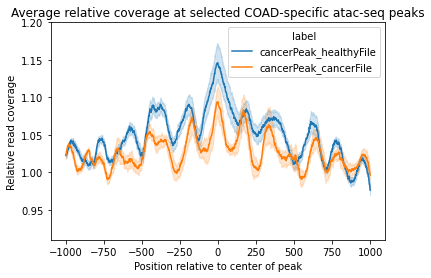

In [19]:
plt.figure()
plt.ylim(0.91,1.2)
p = sns.lineplot(data = temp_coad_zo, x = "new_variable", y = "value", hue = "label", estimator = np.mean, ci = 95)
p.set_xlabel("Position relative to center of peak")
p.set_ylabel("Relative read coverage")
p.set(title="Average relative coverage at selected COAD-specific atac-seq peaks")
plt.savefig('avg_relative_read_coverage.pdf')